<a href="https://colab.research.google.com/github/cardstdani/linalg/blob/main/TF_Linalg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Modules installation and Setup**

The following cells are reserved for the installation of the necesary modules along the rest of following Notebook operations.<br> -To properly configure the **execution runtime**, please execute one by one the next cluster of cells. <br>Note that one of them restarts the environment, so you may have to wait a few seconds before running the next cell.

In [32]:
%%capture
!pip install ipympl

In [10]:
get_ipython().kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

**Setup**

In [1]:
from google.colab import output
output.enable_custom_widget_manager()

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
import numpy as np
import random
%matplotlib widget
matplotlib.interactive(True)

In [2]:
print(tf.__version__)

2.8.2


##**Scalars, Vectors, and the first dimensions**

<div class="markdown-google-sans">
  <h1><b>0 dimension</b></h1>
</div>

<div class="markdown-google-sans">

If we first take a look at the first possible space dimension, we will find that everything existing in it is condensed into a <b>point</b>.

  We can consider the represented point as a <b>scalar</b> value since it contains a numeric parameter <i>(int32, float64, double, complex128...)</i>
</div>

In [44]:
#@title `Show/Hide code` { run: "auto" }

scalar = 90 #@param {type:"number"}
numericType = "quint16" #@param ['bfloat16', 'bool', 'cast', 'complex', 'complex128', 'complex64', 'double', 'float16', 'float32', 'float64', 'half', 'int16', 'int32', 'int64', 'int8', 'qint16', 'qint32', 'qint8', 'quint16', 'quint8', 'resource', 'saturate_cast', 'string', 'uint16', 'uint32', 'uint64', 'uint8', 'variant']

tensorType = eval("tf."+numericType)
try:
  t = tf.constant(scalar, dtype=tensorType)
  print(t)
except Exception as e:
  print(e)

tf.Tensor(90, shape=(), dtype=quint16)


<div class="markdown-google-sans">
  <h1><strong>1 dimension</strong></h1>
</div>

<div class="markdown-google-sans">

If we first take a look at the first possible space dimension, we will find that everything existing in it is condensed into a <b>point</b>.

  We can consider the represented point as a <b>scalar</b> value since it contains a numeric parameter <i>(int32, float64, double, complex128...)</i>
</div>

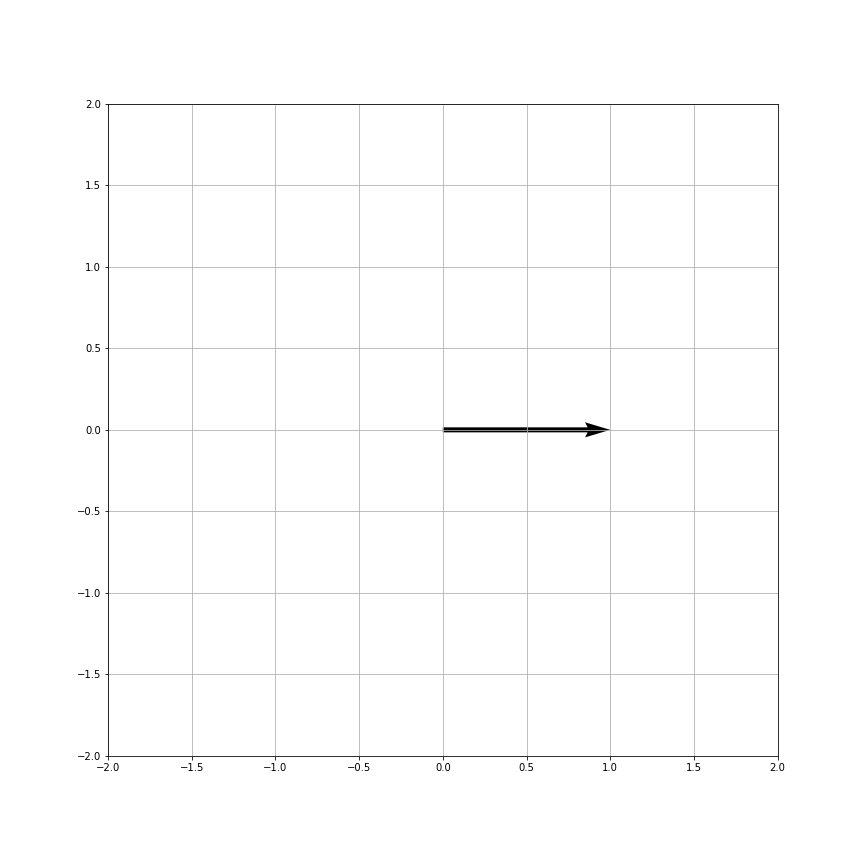

In [145]:
#@title `Show/Hide code` { run: "auto" }

vectorValue = 1 #@param {type:"number"}

t = tf.constant([vectorValue], dtype=tensorType)

fig = plt.figure(figsize=(12, 12))
plt.quiver(t, 0, angles='xy', scale_units='xy', scale=1, color="#000000")

l = np.max(t)+1
plt.xlim([-l, l])
plt.ylim([-l, l])
plt.grid()
plt.show()

##**A vector space in Tensorflow**

(-1.0, 1.0)

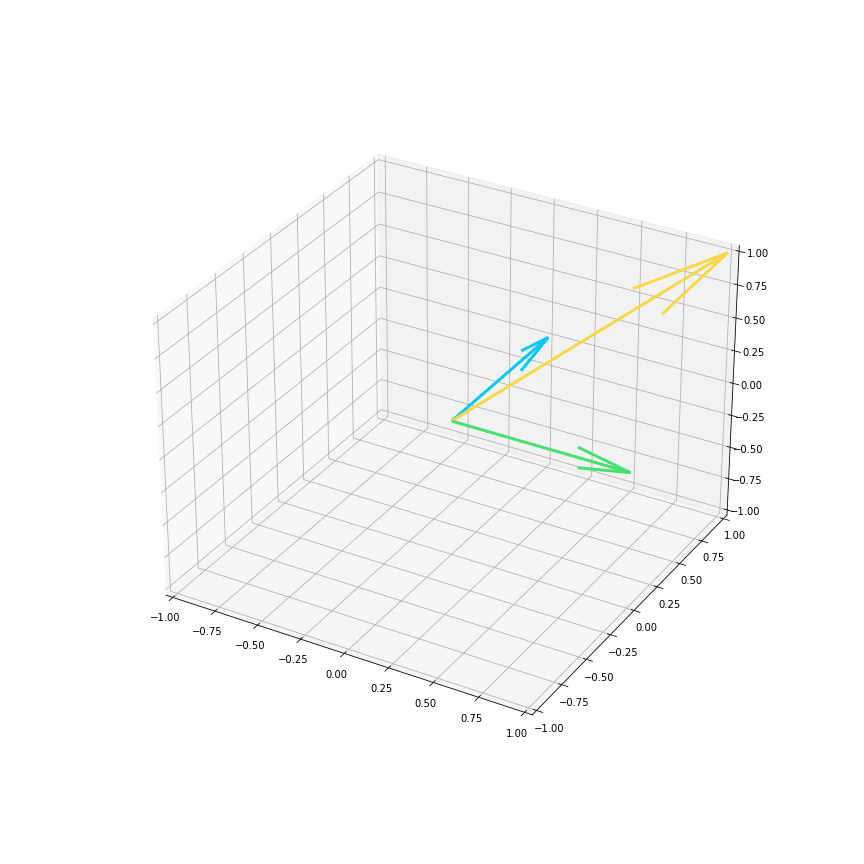

In [93]:
origin = np.array([0, 0, 0])
vectors = tf.constant([[1, 0, 0], [1, 1, 1], [0, 1, 0]])
colors = ["#48e073", "#f8d849", "#05c9f2"]

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

for i in range(len(vectors)):
  ax.quiver(origin[0], origin[1], origin[2], vectors[i][0], vectors[i][1], vectors[i][2], arrow_length_ratio=0.3, lw=3, color=colors[i]) 

l = np.max(vectors)
ax.set_xlim([-l, l])
ax.set_ylim([-l, l])
ax.set_zlim([-l, l])


(-1.0, 1.0)

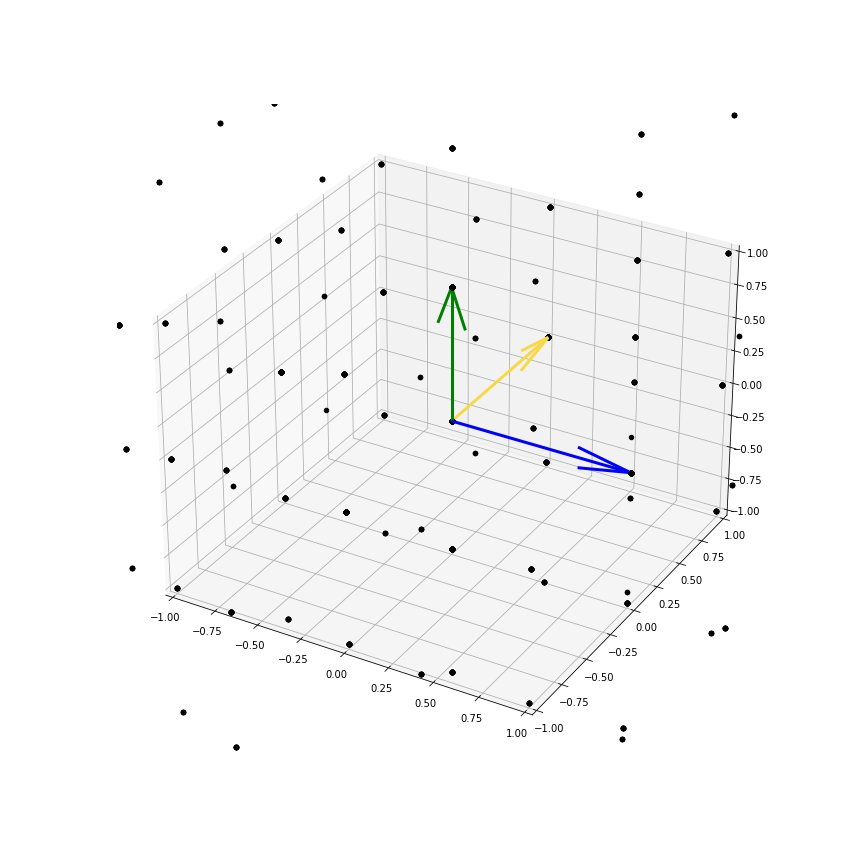

In [ ]:
origin = tf.constant([0, 0, 0])
vectors = tf.constant([[0, 0, 1], 
                       [0, 1, 0], 
                       [1, 0, 0]])

colors = ["g", "#f8d849", "b"]

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

for i in range(len(vectors)):
  ax.quiver(origin[0], origin[1], origin[2], vectors[i][0], vectors[i][1], vectors[i][2], arrow_length_ratio=0.3, lw=3, color=colors[i]) 

r = np.linspace(-2, 2, 10)
for i1 in r:
  for i2 in r:
    for i3 in r:
      v = np.array([0, 0, 0])
      for index in range(len(vectors)):
        v = np.add(v, eval("i"+str(index+1))*vectors[index])
      ax.scatter(v[0], v[1], v[2], color="k") 

l = np.max(vectors)
ax.set_xlim([-l, l])
ax.set_ylim([-l, l])
ax.set_zlim([-l, l])